In [1]:
#Import Dependencies
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [3]:
city_data2_df = pd.read_csv("Weather_Database/WeatherPy_Database.csv")
city_data2_df.head()

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Castro,BR,-24.7911,-50.0119,58.51,71,3,1.81,clear sky
1,1,Severo-Kurilsk,RU,50.6789,156.1250,31.19,77,86,7.63,overcast clouds
2,2,Verkhoyansk,RU,67.5447,133.3850,-1.80,98,57,1.66,broken clouds
3,3,Rikitea,PF,-23.1203,-134.9692,78.42,69,1,12.66,clear sky
4,4,Provideniya,RU,64.3833,-173.3000,32.11,93,100,24.61,snow


#### Create Latitude and Longitude Combinations

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs # will give a zip object in a memory location

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
len(coordinates)

1500

### 6.1.5 Generate Random World Cities

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

610

### 6.2 Retrieve, Collect, and Clean Weather Data
#### 6.2.6 Get the City Weather Data
#### Import Dependencies, and Initialize an Empty List and Counters (done at top); build basic url

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2c5a3292ca89f5d46553a133e524fa3f


In [7]:
#QUESTION 1, 2
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1 # 1 to 50 cities
set_count = 1 # no. of set of 50 cities

# Loop through all the cities in our list.
for i, city in enumerate(cities): # replaced: for i in range(len(cities)) --> this retruns index to URL. enumerate() returns city and index
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 # resets the city count at the beginning of every new set
        time.sleep(60) # free tier allows 60 calls/minute. Tells program to stop for a minute after 50 calls preventing runtime errors
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+") # replace city name's spaces with + to concatenate

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1 #processes the next city

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({
            "City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san cristobal
Processing Record 2 of Set 1 | namatanai
Processing Record 3 of Set 1 | tilichiki
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | ningbo
Processing Record 6 of Set 1 | melbu
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | kemi
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | san alberto
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | charo
Processing Record 16 of Set 1 | marzuq
Processing Record 17 of Set 1 | padang
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | piacabucu
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | skibbereen
Processing Record 23 of Set 1 | jamestown


Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | hit
Processing Record 47 of Set 4 | yulara
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | kaitangata
Processing Record 50 of Set 4 | ginda
Processing Record 1 of Set 5 | mersing
Processing Record 2 of Set 5 | ituni
City not found. Skipping...
Processing Record 3 of Set 5 | egvekinot
Processing Record 4 of Set 5 | hermon
Processing Record 5 of Set 5 | barmer
Processing Record 6 of Set 5 | cahors
Processing Record 7 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 5 | belem
Processing Record 9 of Set 5 | acapulco
Processing Record 10 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 5 | los llanos de aridane
Processing Record 12 of Set 5 | college
Processing Record 13 of Set 5 | leua


Processing Record 32 of Set 8 | lolua
City not found. Skipping...
Processing Record 33 of Set 8 | gemena
Processing Record 34 of Set 8 | jinxiang
Processing Record 35 of Set 8 | kikwit
Processing Record 36 of Set 8 | desert hot springs
Processing Record 37 of Set 8 | duzce
Processing Record 38 of Set 8 | richards bay
Processing Record 39 of Set 8 | the valley
Processing Record 40 of Set 8 | anzio
Processing Record 41 of Set 8 | portland
Processing Record 42 of Set 8 | warrington
Processing Record 43 of Set 8 | sao filipe
Processing Record 44 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 45 of Set 8 | ornskoldsvik
Processing Record 46 of Set 8 | hofn
Processing Record 47 of Set 8 | tabuk
Processing Record 48 of Set 8 | yellamanchili
City not found. Skipping...
Processing Record 49 of Set 8 | macau
Processing Record 50 of Set 8 | avera
Processing Record 1 of Set 9 | nouakchott
Processing Record 2 of Set 9 | kuytun
Processing Record 3 of Set 9 | balad
Processing R

Processing Record 21 of Set 12 | belaya gora
Processing Record 22 of Set 12 | limay
Processing Record 23 of Set 12 | irbeyskoye
Processing Record 24 of Set 12 | boa vista
Processing Record 25 of Set 12 | chalmette
Processing Record 26 of Set 12 | chaplynka
Processing Record 27 of Set 12 | faya
Processing Record 28 of Set 12 | mayo
Processing Record 29 of Set 12 | jiexiu
Processing Record 30 of Set 12 | seymchan
Processing Record 31 of Set 12 | solano
Processing Record 32 of Set 12 | kamina
Processing Record 33 of Set 12 | tarakan
Processing Record 34 of Set 12 | hearst
Processing Record 35 of Set 12 | gushikawa
Processing Record 36 of Set 12 | marsh harbour
Processing Record 37 of Set 12 | abha
Processing Record 38 of Set 12 | ulaangom
Processing Record 39 of Set 12 | komsomolskiy
Processing Record 40 of Set 12 | pasni
Processing Record 41 of Set 12 | kuusamo
Processing Record 42 of Set 12 | sooke
Processing Record 43 of Set 12 | nefteyugansk
Processing Record 44 of Set 12 | samalaeulu

In [8]:
len(city_data) #needs to be >500

567

In [9]:
#print(cities)
#print(city_data)

In [4]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

NameError: name 'city_data' is not defined

In [11]:
# Create the output file (CSV).
# output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
# city_data_df.to_csv(output_data_file, index_label = "City_ID")

### 6.3 Plot Weather Data

In [12]:
# loading the data from the CSV then dropping the City_ID column
city_data_df = pd.read_csv("weather_data\cities.csv")
#city_data_df = city_data_df.drop(columns = "City_ID")
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,San Cristobal,VE,2022-04-16 22:27:14,7.7669,-72.2250,78.98,70,100,4.85
1,1,Namatanai,PG,2022-04-16 22:27:15,-3.6667,152.4333,81.88,76,98,4.32
2,2,Tilichiki,RU,2022-04-16 22:27:15,60.4667,166.1000,28.54,86,97,5.03
3,3,Talnakh,RU,2022-04-16 22:27:15,69.4865,88.3972,16.03,94,100,9.40
4,4,Ningbo,CN,2022-04-16 22:27:16,29.8782,121.5495,55.98,99,67,2.24
...,...,...,...,...,...,...,...,...,...,...
562,562,Carmen,MX,2022-04-16 22:42:07,18.6333,-91.8333,87.84,70,0,13.80
563,563,Pozo Colorado,PY,2022-04-16 22:42:07,-23.4923,-58.7972,69.33,45,86,2.57
564,564,Izmit,TR,2022-04-16 22:42:07,40.7669,29.9169,46.38,87,0,2.30
565,565,Tocopilla,CL,2022-04-16 22:42:08,-22.0920,-70.1979,64.22,75,18,9.66


In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
current_date = time.strftime("%x")

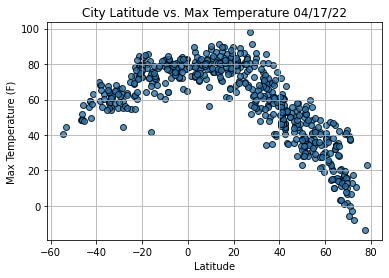

In [7]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ current_date)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

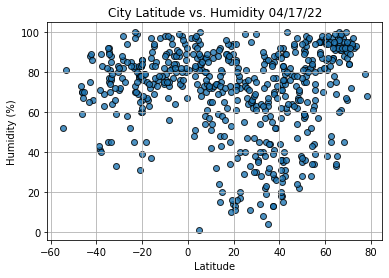

In [8]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ current_date)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

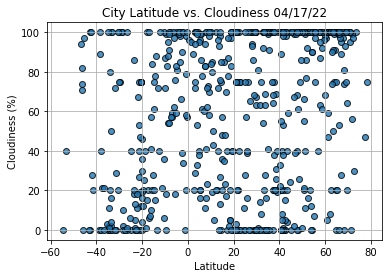

In [9]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ current_date)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

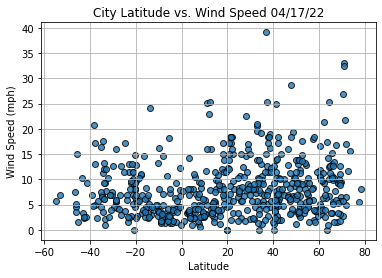

In [10]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ current_date)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### 6.4 Determine Correlations
#### Create a Linear Regression Function


In [92]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red") #text_coordinates is location of line on plot
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    print(f"The p-value is: {p_value}")
    print(f"The r-value is: {r_value:.3f}")

#### Create the Hemisphere DataFrames

In [93]:
index13 = city_data_df.loc[13] #loc returns a row at an indicated index or condition

In [94]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)] #400 cities
#returns DataFrame of rows where Lat>=0 (Northern Hemisphere)

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)] #167 cities

### Find the Correlation Between Latitude and Maximum Temperature

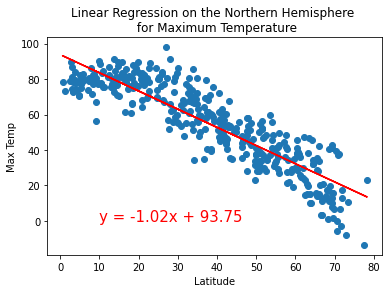

The p-value is: 2.4710830904109543e-137
The r-value is: -0.889


In [95]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

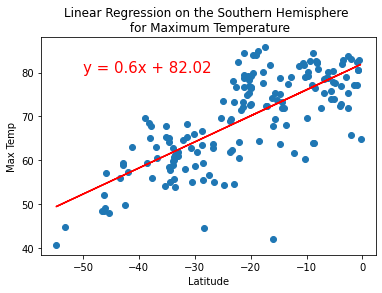

The p-value is: 1.238193788793665e-29
The r-value is: 0.735


In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

##### Findings:
The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

### Find the Correlation Between Latitude and Percent Humidity

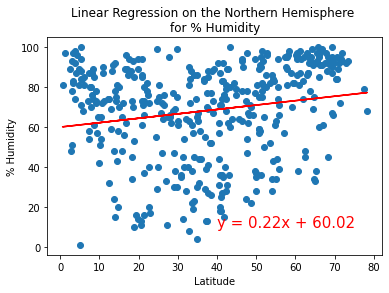

The p-value is: 0.00019559225101639316
The r-value is: 0.185


In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

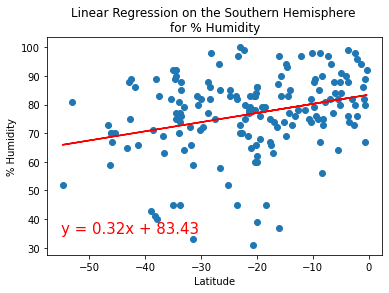

The p-value is: 0.00011038953972737938
The r-value is: 0.295


In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-55,35))

##### Findings:
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 


### Find the Correlation Between Latitude and Percent Cloudiness

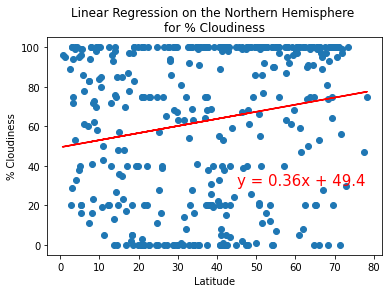

The p-value is: 0.00013783554968225788
The r-value is: 0.189


In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(45,30))

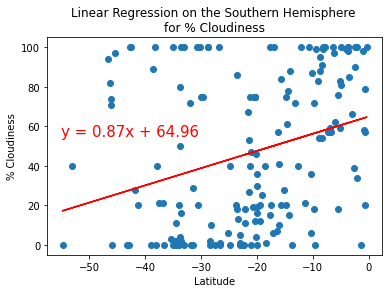

The p-value is: 0.00010182197967440798
The r-value is: 0.296


In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,55))

##### Findings:
The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

### Find the Correlation Between Latitude and Wind Speed

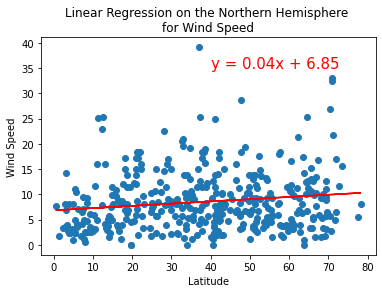

The p-value is: 0.002291655943299902
The r-value is: 0.152


In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

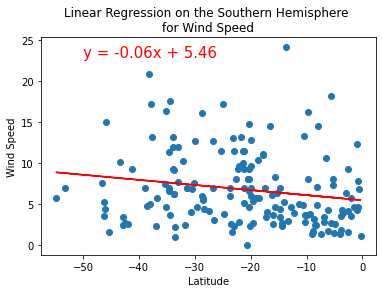

The p-value is: 0.01883101718895781
The r-value is: -0.182


In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,23))

##### Findings:
The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 



## Test

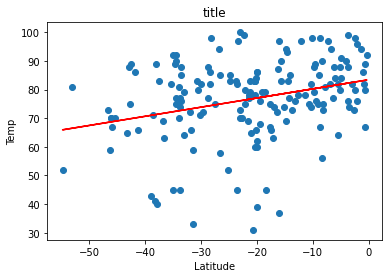

The p-value is: 0.00011038953972737938
The r-value is: 0.295


In [111]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title('title')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

print(f"The p-value is: {p_value}")
print(f"The r-value is: {r_value:.3f}")